In [2]:
import pandas as pd 
import numpy as np
import itertools 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
orthogroups = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Orthogroups.tsv', sep = '\t')
orthogroups

,Orthogroup,SlycHeinz4.0,Smel4.1,Solabu2_1.0.4,Solaet3_3.0.4,Solcan1_1.0.4,Solcle2_1.0.4,Soletu1_1.0.4,Solgig1_1.0.4,Sollin1_1.0.4,SollycM82_1.0.4,SollycSweet-100_2.0.4,Solmac3_3.0.4,Solmur2hap1_2.0.4,Solmur2hap2_2.0.4,Solpri1_2.0.4,Solqui2_2.0.4,Solrob1_1.0.4
0,OG0000000,NaN,"SMEL4.1_00g007950.1.01, SMEL4.1_00g008920.1.01...","Solabu2.01g007150.1, Solabu2.01g008630.1, Sola...","Solaet3.01g012880.1, Solaet3.01g015280.1, Sola...","Solcan1.01g001750.1, Solcan1.01g006400.1, Solc...","Solcle2.01g009770.1, Solcle2.01g020010.1, Solc...","Soletu1.01g012220.1, Soletu1.09g011190.1, Sole...","Solgig1.01g009290.1, Solgig1.01g010580.1, Solg...","Sollin1.01g004130.1, Sollin1.01g006120.1, Soll...",NaN,SollycSweet-100.02g006670.1,"Solmac3.01g004710.1, Solmac3.01g005730.1, Solm...","Solmur2hap1.03g007570.1, Solmur2hap1.04g010710...","Solmur2hap2.03g007770.1, Solmur2hap2.05g016120...","Solpri1.01g002060.1, Solpri1.01g010200.1, Solp...","Solqui2.01g004180.1, Solqui2.01g011410.1, Solq...","Solrob1.01g001070.1, Solrob1.01g007660.1, Solr..."
1,OG0000001,NaN,"SMEL4.1_00g001660.1.01, SMEL4.1_00g001710.1.01...","Solabu2.02g000030.1, Solabu2.02g000040.1, Sola...","Solaet3.02g000060.1, Solaet3.02g000410.1, Sola...","Solcan1.01g000150.1, Solcan1.ctg00000004g00003...","Solcle2.ctg00000001g000020.1, Solcle2.ctg00000...","Soletu1.ctg00000005g000010.1, Soletu1.ctg00000...","Solgig1.02g000010.1, Solgig1.02g000050.1, Solg...","Sollin1.02g000010.1, Sollin1.02g000050.1, Soll...","SollycM82.ctg00000028g000020.1, SollycM82.ctg0...","SollycSweet-100.ctg00000007g000060.1, SollycSw...","Solmac3.02g000350.1, Solmac3.02g000560.1, Solm...","Solmur2hap1.02g000070.1, Solmur2hap1.02g000320...","Solmur2hap2.02g000010.1, Solmur2hap2.02g000070...","Solpri1.02g000030.1, Solpri1.02g000140.1, Solp...","Solqui2.02g034670.1, Solqui2.09g017150.1, Solq...","Solrob1.02g026320.1, Solrob1.02g035130.1, Solr..."
2,OG0000002,NaN,"SMEL4.1_00g001730.1.01, SMEL4.1_00g002590.1.01...","Solabu2.02g000170.1, Solabu2.02g000320.1, Sola...","Solaet3.02g000330.1, Solaet3.02g000430.1, Sola...","Solcan1.ctg00000004g000010.1, Solcan1.ctg00000...","Solcle2.02g000020.1, Solcle2.02g000040.1, Solc...","Soletu1.ctg00000074g000010.1, Soletu1.ctg00000...","Solgig1.02g000030.1, Solgig1.ctg00000001g00004...","Sollin1.02g000030.1, Sollin1.02g000110.1, Soll...","SollycM82.ctg00000420g000010.1, SollycM82.ctg0...","SollycSweet-100.ctg00000006g000010.1, SollycSw...","Solmac3.02g000140.1, Solmac3.02g000380.1, Solm...","Solmur2hap1.02g000030.1, Solmur2hap1.02g000040...","Solmur2hap2.02g000030.1, Solmur2hap2.02g000130...","Solpri1.01g010730.1, Solpri1.01g011910.1, Solp...","Solqui2.09g017170.1, Solqui2.ctg00000062g00001...","Solrob1.02g026300.1, Solrob1.02g034570.1, Solr..."
3,OG0000003,Solyc02g004000.1.1,"SMEL4.1_00g001580.1.01, SMEL4.1_00g001670.1.01...","Solabu2.02g000050.1, Solabu2.02g000080.1, Sola...","Solaet3.02g000070.1, Solaet3.02g000130.1, Sola...","Solcan1.ctg00000007g000030.1, Solcan1.ctg00000...","Solcle2.11g017400.1, Solcle2.ctg00000002g00002...","Soletu1.ctg00000005g000030.1, Soletu1.ctg00000...","Solgig1.02g000020.1, Solgig1.02g000060.1, Solg...","Sollin1.02g000020.1, Sollin1.02g000060.1, Soll...","SollycM82.ctg00000029g000010.1, SollycM82.ctg0...","SollycSweet-100.ctg00000002g000010.1, SollycSw...","Solmac3.02g000130.1, Solmac3.02g000430.1, Solm...","Solmur2hap1.02g000050.1, Solmur2hap1.02g000100...","Solmur2hap2.02g000020.1, Solmur2hap2.02g000080...","Solpri1.01g010660.1, Solpri1.02g000040.1, Solp...","Solqui2.02g034690.1, Solqui2.09g017160.1, Solq...","Solrob1.02g026310.1, Solrob1.02g034470.1, Solr..."
4,OG0000004,NaN,"SMEL4.1_00g006210.1.01, SMEL4.1_08g009900.1.01...",NaN,"Solaet3.02g000010.1, Solaet3.02g000630.1, Sola...","Solcan1.01g000130.1, Solcan1.ctg00000000g00002...","Solcle2.ctg00000073g000010.1, Solcle2.ctg00000...","Soletu1.08g005110.1, Soletu1.11g002430.1, Sole...","Solgig1.02g000070.1, Solgig1.ctg00000001g00013...","Sollin1.ctg00000005g000020.1, Sollin1.ctg00000...","SollycM82.ctg000001

In [4]:
quitoense_table = orthogroups[['Orthogroup','Solaet3_3.0.4']]
quitoense_table = quitoense_table.dropna()
quitoense_table

,Orthogroup,Solaet3_3.0.4
0,OG0000000,"Solaet3.01g012880.1, Solaet3.01g015280.1, Sola..."
1,OG0000001,"Solaet3.02g000060.1, Solaet3.02g000410.1, Sola..."
2,OG0000002,"Solaet3.02g000330.1, Solaet3.02g000430.1, Sola..."
3,OG0000003,"Solaet3.02g000070.1, Solaet3.02g000130.1, Sola..."
4,OG0000004,"Solaet3.02g000010.1, Solaet3.02g000630.1, Sola..."
...,...,...
40185,OG0040185,"Solaet3.12g029970.1, Solaet3.12g030050.1"
40186,OG0040186,Solaet3.12g030430.1
40187,OG0040187,"Solaet3.ctg00000138g000040.1, Solaet3.ctg00000..."
40188,OG0040188,Solaet3.ctg00000380g000020.1


In [5]:
len(quitoense_table['Solaet3_3.0.4'][0].replace(" ",'').split(','))

103

In [6]:
df_conversion_base = []
list_of_lenghts = []
for Orthogroup_row in quitoense_table.iterrows():
    current_orthogroup = Orthogroup_row[1][0]
    current_list_of_genes_in_group = Orthogroup_row[1][1].replace(" ",'').split(',')
    list_of_lenghts.append(len(current_list_of_genes_in_group))
    if len(current_list_of_genes_in_group) >2 or len(current_list_of_genes_in_group) == 1:
        continue
    orthogroup_list = [current_orthogroup]*len(current_list_of_genes_in_group)
    zipped_list = zip(orthogroup_list, current_list_of_genes_in_group)
    df_conversion_base.extend(list(zipped_list))


Text(0.5, 1.0, 'Current Threshold is 31')

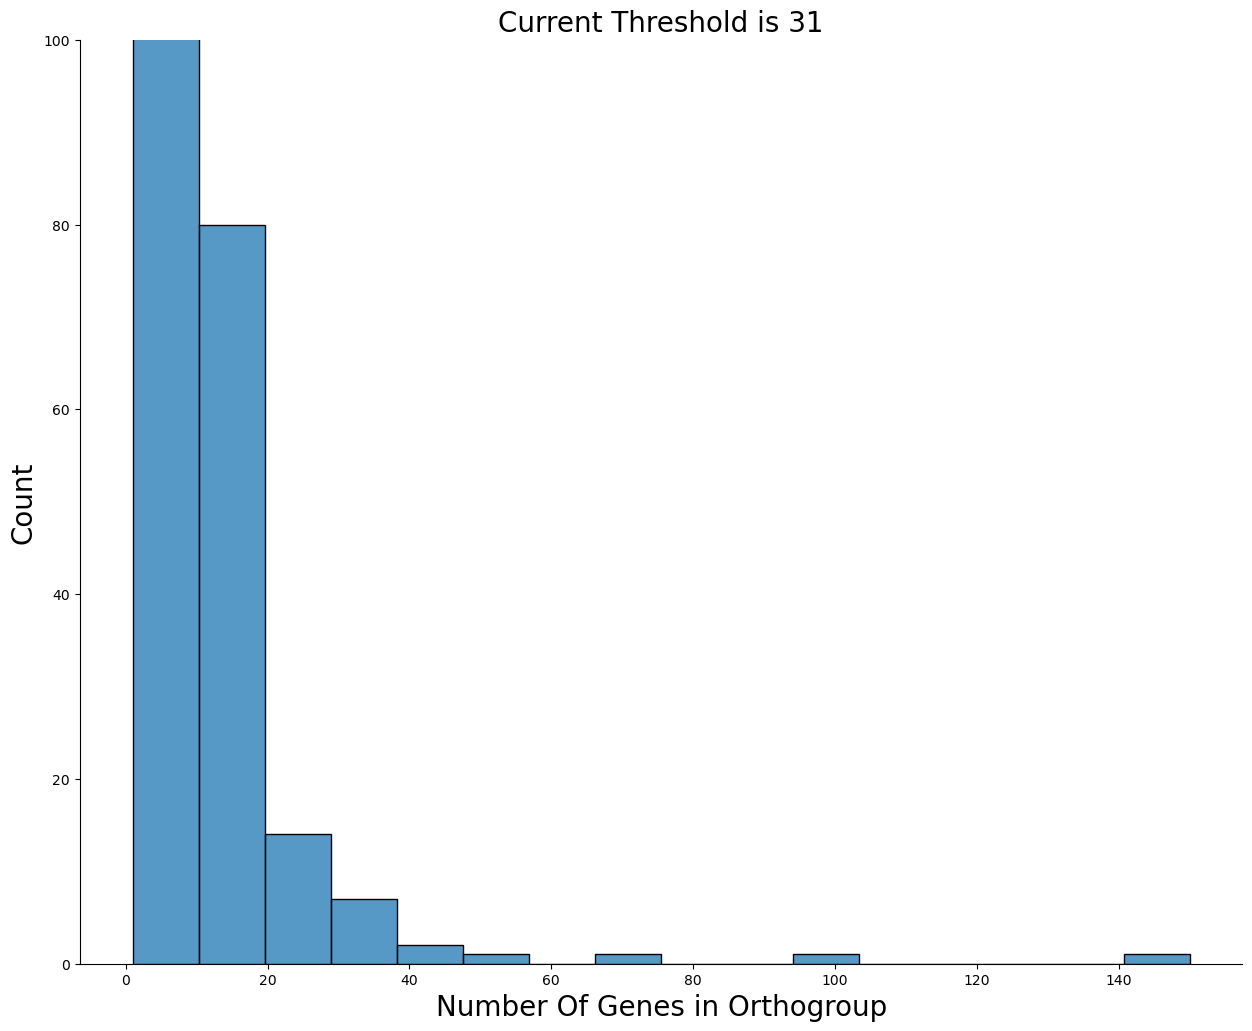

In [7]:
fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot( x =list_of_lenghts,)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Number Of Genes in Orthogroup", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.ylim((0,100))
plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [8]:
quitoense_long_df = pd.DataFrame(data=df_conversion_base, columns = ['Orthogroup','Gene'])
quitoense_long_df

,Orthogroup,Gene
0,OG0000015,Solaet3.ctg00000292g000010.1
1,OG0000015,Solaet3.ctg00000347g000030.1
2,OG0000213,Solaet3.01g006260.1
3,OG0000213,Solaet3.12g010020.1
4,OG0000255,Solaet3.01g017650.1
...,...,...
6035,OG0040172,Solaet3.12g016010.1
6036,OG0040185,Solaet3.12g029970.1
6037,OG0040185,Solaet3.12g030050.1
6038,OG0040187,Solaet3.ctg00000138g000040.1


In [9]:
quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == 'OG0044943']

,Orthogroup,Gene


In [10]:
current_list_of_genes_in_group

['Solaet3.ctg00000407g000010.1']

In [11]:
list_of_gene_pairs_in_ortho_group = []
for ortho in set(quitoense_long_df['Orthogroup']):
    matched_long_df = quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == ortho]
    all_combinations_in_orthogroup = list(itertools.combinations(matched_long_df['Gene'].to_list(),2))
    list_of_gene_pairs_in_ortho_group.extend(all_combinations_in_orthogroup)

In [12]:
ortho_gene_pairs_df = pd.DataFrame(data=  list_of_gene_pairs_in_ortho_group, columns = ['Alpha Gene','Beta Gene'])
ortho_gene_pairs_df

,Alpha Gene,Beta Gene
0,Solaet3.05g001400.1,Solaet3.05g001440.1
1,Solaet3.12g002830.1,Solaet3.12g002840.1
2,Solaet3.11g009990.1,Solaet3.12g023710.1
3,Solaet3.08g007480.1,Solaet3.08g007500.1
4,Solaet3.01g017540.1,Solaet3.01g017550.1
...,...,...
3015,Solaet3.09g027360.1,Solaet3.12g028560.1
3016,Solaet3.06g017360.1,Solaet3.06g017420.1
3017,Solaet3.07g011320.1,Solaet3.07g011370.1
3018,Solaet3.01g021730.1,Solaet3.06g006360.1


In [13]:
normalized_combined_sample = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/fpkm_normalized_combined_samples.tsv', sep = '\t', index_col= 0)


In [14]:
normalized_combined_sample.index = normalized_combined_sample.index+".1"

In [15]:
normalized_combined_sample['Mean'] = normalized_combined_sample.mean(axis =1)
normalized_combined_sample

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean
FEATURE_ID,,,,,,,
Solaet3.Mg000010.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.Mg000020.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.Mg000030.1,0.0,0.0,0.000000,0.022054,0.0,0.0,0.003676
Solaet3.Mg000040.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.Mg000050.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
Solaet3.ctg00000413g000060.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.ctg00000414g000010.1,0.0,0.0,0.165982,0.000000,0.0,0.0,0.027664
Solaet3.ctg00000414g000020.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [16]:
quitoense_exploration_of_btw_rep_variance = normalized_combined_sample.copy()
quitoense_exploration_of_btw_rep_variance['Rep Difference'] = abs(quitoense_exploration_of_btw_rep_variance['Rep 1'] - quitoense_exploration_of_btw_rep_variance['Rep 2'])

In [17]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean,Rep Difference
FEATURE_ID,,,,,,,,
Solaet3.Mg000010.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
Solaet3.Mg000020.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
Solaet3.Mg000030.1,0.0,0.0,0.000000,0.022054,0.0,0.0,0.003676,0.0
Solaet3.Mg000040.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
Solaet3.Mg000050.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
Solaet3.ctg00000413g000060.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
Solaet3.ctg00000414g000010.1,0.0,0.0,0.165982,0.000000,0.0,0.0,0.027664,0.0
Solaet3.ctg00000414g000020.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [18]:
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.replace(0,np.nan)
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.dropna(subset = ['Rep 1','Rep 2'], how = 'all')
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.replace(np.nan, 0)
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean,Rep Difference
FEATURE_ID,,,,,,,,
Solaet3.Mg000090.1,3.145529,3.892350,2.684900,2.482015,2.769154,4.112615,3.181094,0.746821
Solaet3.Mg000130.1,0.646610,0.207623,0.415165,0.392615,0.562375,0.475042,0.449905,0.438988
Solaet3.Mg000140.1,0.165959,1.349974,4.049137,1.276404,1.613203,2.647502,1.850363,1.184015
Solaet3.Mg000150.1,0.116052,0.118001,0.294946,0.111571,0.507637,0.404982,0.258865,0.001949
Solaet3.Mg000170.1,2.261540,1.443499,2.198393,1.190261,1.476249,2.402990,1.828822,0.818041
...,...,...,...,...,...,...,...,...
Solaet3.ctg00000404g000030.1,0.000000,0.044962,0.000000,0.000000,0.000000,0.000000,0.007494,0.044962
ncRNA_Solaet3.ctg00000404g004121.1,0.175339,0.713138,0.178250,0.337137,0.000000,0.174821,0.263114,0.537799
Solaet3.ctg00000405g000010.1,0.080495,0.000000,0.000000,0.000000,0.000000,0.000000,0.013416,0.080495


In [19]:
quitoense_exploration_of_btw_rep_variance.max()

Rep 1             5531.681338
Rep 2             6571.784132
Rep 3             5150.999864
Rep 4             5495.340722
Rep 5             5664.025266
Rep 6             5963.189890
Mean              5443.337212
Rep Difference    2651.044958
dtype: float64

In [20]:
quitoense_exploration_of_btw_rep_variance.median()

Rep 1             6.958749
Rep 2             7.064831
Rep 3             7.239337
Rep 4             6.720541
Rep 5             6.866389
Rep 6             7.173970
Mean              7.088233
Rep Difference    0.585385
dtype: float64

In [21]:
np.percentile(quitoense_exploration_of_btw_rep_variance['Rep Difference'], 95)

7.222650485593193

In [22]:
# fig, ax = plt.subplots(figsize = (13,10))
# fig.patch.set_facecolor('white')
# ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Rep 1',)
# plt.ylabel("Count", fontsize = 20)
# plt.xlabel("Single Rep Gene Expression Level", fontsize = 20)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
# plt.ylim((0, 1250))
# #plt.title("Current Threshold is 31", fontsize = 20)
# #plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# #plt.yticks(fontsize = 11)

(0.0, 1250.0)

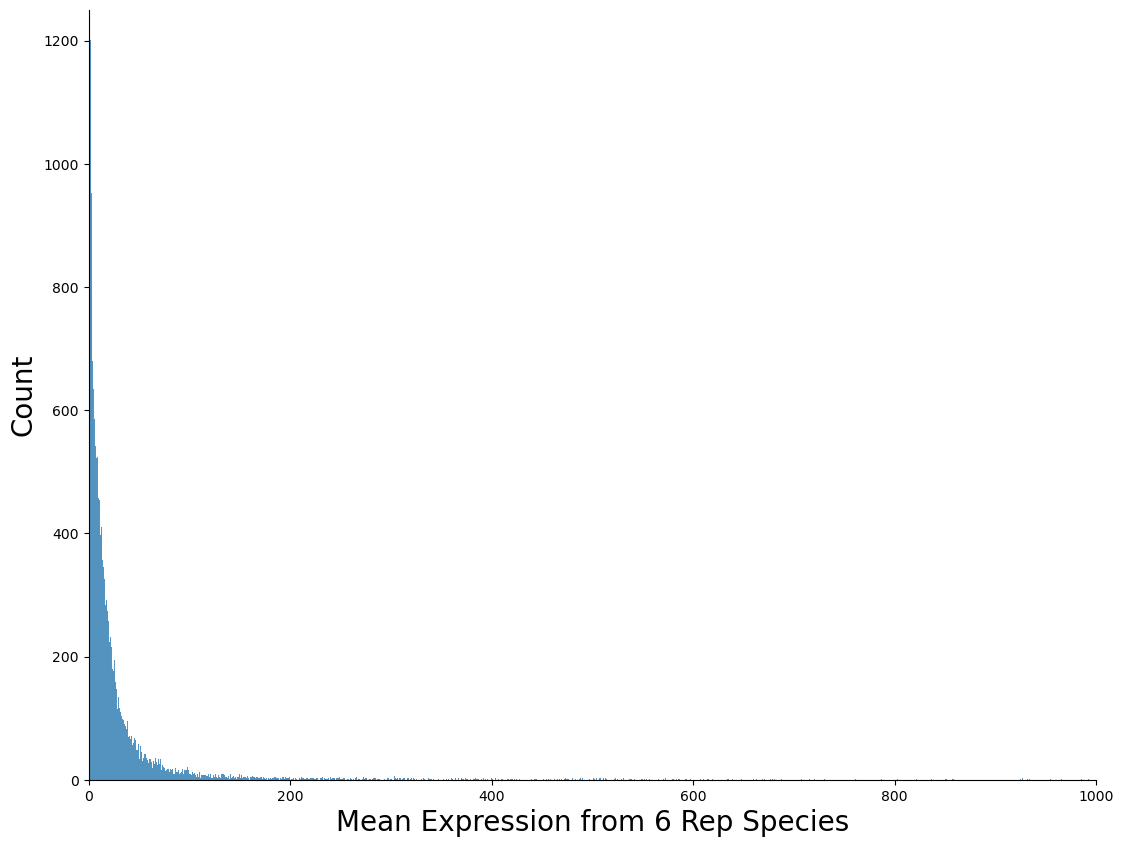

In [23]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = normalized_combined_sample, x = 'Mean',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Mean Expression from 6 Rep Species", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,1000))
plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [24]:
quitoense_exploration_of_btw_rep_variance['Variance'] = quitoense_exploration_of_btw_rep_variance[['Rep 1','Rep 2','Rep 3','Rep 4','Rep 5','Rep 6']].var(axis = 1)
quitoense_exploration_of_btw_rep_variance['Standard Deviation'] = quitoense_exploration_of_btw_rep_variance[['Rep 1','Rep 2','Rep 3','Rep 4','Rep 5','Rep 6']].std(axis = 1)


In [25]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean,Rep Difference,Variance,Standard Deviation
FEATURE_ID,,,,,,,,,,
Solaet3.Mg000090.1,3.145529,3.892350,2.684900,2.482015,2.769154,4.112615,3.181094,0.746821,0.455899,0.675203
Solaet3.Mg000130.1,0.646610,0.207623,0.415165,0.392615,0.562375,0.475042,0.449905,0.438988,0.023033,0.151766
Solaet3.Mg000140.1,0.165959,1.349974,4.049137,1.276404,1.613203,2.647502,1.850363,1.184015,1.788663,1.337409
Solaet3.Mg000150.1,0.116052,0.118001,0.294946,0.111571,0.507637,0.404982,0.258865,0.001949,0.029295,0.171157
Solaet3.Mg000170.1,2.261540,1.443499,2.198393,1.190261,1.476249,2.402990,1.828822,0.818041,0.266808,0.516534
...,...,...,...,...,...,...,...,...,...,...
Solaet3.ctg00000404g000030.1,0.000000,0.044962,0.000000,0.000000,0.000000,0.000000,0.007494,0.044962,0.000337,0.018356
ncRNA_Solaet3.ctg00000404g004121.1,0.175339,0.713138,0.178250,0.337137,0.000000,0.174821,0.263114,0.537799,0.059986,0.244921
Solaet3.ctg00000405g000010.1,0.080495,0.000000,0.000000,0.000000,0.000000,0.000000,0.013416,0.080495,0.001080,0.032862


In [26]:
quitoense_exploration_of_btw_rep_variance['Variance'] = quitoense_exploration_of_btw_rep_variance['Variance'].round(3)
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean,Rep Difference,Variance,Standard Deviation
FEATURE_ID,,,,,,,,,,
Solaet3.Mg000090.1,3.145529,3.892350,2.684900,2.482015,2.769154,4.112615,3.181094,0.746821,0.456,0.675203
Solaet3.Mg000130.1,0.646610,0.207623,0.415165,0.392615,0.562375,0.475042,0.449905,0.438988,0.023,0.151766
Solaet3.Mg000140.1,0.165959,1.349974,4.049137,1.276404,1.613203,2.647502,1.850363,1.184015,1.789,1.337409
Solaet3.Mg000150.1,0.116052,0.118001,0.294946,0.111571,0.507637,0.404982,0.258865,0.001949,0.029,0.171157
Solaet3.Mg000170.1,2.261540,1.443499,2.198393,1.190261,1.476249,2.402990,1.828822,0.818041,0.267,0.516534
...,...,...,...,...,...,...,...,...,...,...
Solaet3.ctg00000404g000030.1,0.000000,0.044962,0.000000,0.000000,0.000000,0.000000,0.007494,0.044962,0.000,0.018356
ncRNA_Solaet3.ctg00000404g004121.1,0.175339,0.713138,0.178250,0.337137,0.000000,0.174821,0.263114,0.537799,0.060,0.244921
Solaet3.ctg00000405g000010.1,0.080495,0.000000,0.000000,0.000000,0.000000,0.000000,0.013416,0.080495,0.001,0.032862


In [27]:
quitoense_exploration_of_btw_rep_variance['Mean']

FEATURE_ID
Solaet3.Mg000090.1                    3.181094
Solaet3.Mg000130.1                    0.449905
Solaet3.Mg000140.1                    1.850363
Solaet3.Mg000150.1                    0.258865
Solaet3.Mg000170.1                    1.828822
                                        ...   
Solaet3.ctg00000404g000030.1          0.007494
ncRNA_Solaet3.ctg00000404g004121.1    0.263114
Solaet3.ctg00000405g000010.1          0.013416
Solaet3.ctg00000409g000050.1          0.046102
Solaet3.ctg00000409g000110.1          0.015995
Name: Mean, Length: 27599, dtype: float64

In [28]:
quitoense_exploration_of_btw_rep_variance['Variance']

FEATURE_ID
Solaet3.Mg000090.1                    0.456
Solaet3.Mg000130.1                    0.023
Solaet3.Mg000140.1                    1.789
Solaet3.Mg000150.1                    0.029
Solaet3.Mg000170.1                    0.267
                                      ...  
Solaet3.ctg00000404g000030.1          0.000
ncRNA_Solaet3.ctg00000404g004121.1    0.060
Solaet3.ctg00000405g000010.1          0.001
Solaet3.ctg00000409g000050.1          0.003
Solaet3.ctg00000409g000110.1          0.000
Name: Variance, Length: 27599, dtype: float64

In [29]:
quitoense_exploration_of_btw_rep_variance.sample(n = 5, random_state= 10)

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean,Rep Difference,Variance,Standard Deviation
FEATURE_ID,,,,,,,,,,
Solaet3.01g028640.1,23.063215,21.264541,23.777231,19.510658,22.450239,20.624135,21.781670,1.798674,2.567,1.602274
Solaet3.08g011030.1,3.840767,0.390528,3.123620,0.553868,1.680036,2.680596,2.044903,3.450239,1.977,1.406139
Solaet3.07g034790.1,0.083322,0.423610,0.508234,0.320420,0.242980,0.332305,0.318479,0.340288,0.022,0.147141
Solaet3.06g002710.1,13.711537,12.506663,19.063842,8.917279,12.936277,16.887756,14.003893,1.204874,12.652,3.556975
Solaet3.11g025260.1,58.034493,54.673938,58.395867,67.863096,54.858152,50.128330,57.325646,3.360555,35.521,5.959985


In [30]:
quitoense_exploration_of_btw_rep_variance.sample(n = 500, random_state= 10).dropna(subset = 'Variance')

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean,Rep Difference,Variance,Standard Deviation
FEATURE_ID,,,,,,,,,,
Solaet3.01g028640.1,23.063215,21.264541,23.777231,19.510658,22.450239,20.624135,21.781670,1.798674,2.567,1.602274
Solaet3.08g011030.1,3.840767,0.390528,3.123620,0.553868,1.680036,2.680596,2.044903,3.450239,1.977,1.406139
Solaet3.07g034790.1,0.083322,0.423610,0.508234,0.320420,0.242980,0.332305,0.318479,0.340288,0.022,0.147141
Solaet3.06g002710.1,13.711537,12.506663,19.063842,8.917279,12.936277,16.887756,14.003893,1.204874,12.652,3.556975
Solaet3.11g025260.1,58.034493,54.673938,58.395867,67.863096,54.858152,50.128330,57.325646,3.360555,35.521,5.959985
...,...,...,...,...,...,...,...,...,...,...
Solaet3.02g012480.1,7.447340,7.915338,8.313781,8.510659,7.375768,8.462091,8.004163,0.467998,0.255,0.504960
Solaet3.11g022970.1,4.084730,4.223738,4.539638,5.058505,3.499474,3.693010,4.183183,0.139008,0.322,0.567858
Solaet3.05g007240.1,4.670431,4.449833,4.317416,3.664449,4.448403,4.797391,4.391321,0.220597,0.157,0.395798


In [31]:
quitoense_exploration_of_btw_rep_variance['Coefficient of Variation'] = quitoense_exploration_of_btw_rep_variance['Standard Deviation']/quitoense_exploration_of_btw_rep_variance['Mean']
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean,Rep Difference,Variance,Standard Deviation,Coefficient of Variation
FEATURE_ID,,,,,,,,,,,
Solaet3.Mg000090.1,3.145529,3.892350,2.684900,2.482015,2.769154,4.112615,3.181094,0.746821,0.456,0.675203,0.212255
Solaet3.Mg000130.1,0.646610,0.207623,0.415165,0.392615,0.562375,0.475042,0.449905,0.438988,0.023,0.151766,0.337328
Solaet3.Mg000140.1,0.165959,1.349974,4.049137,1.276404,1.613203,2.647502,1.850363,1.184015,1.789,1.337409,0.722782
Solaet3.Mg000150.1,0.116052,0.118001,0.294946,0.111571,0.507637,0.404982,0.258865,0.001949,0.029,0.171157,0.661182
Solaet3.Mg000170.1,2.261540,1.443499,2.198393,1.190261,1.476249,2.402990,1.828822,0.818041,0.267,0.516534,0.282441
...,...,...,...,...,...,...,...,...,...,...,...
Solaet3.ctg00000404g000030.1,0.000000,0.044962,0.000000,0.000000,0.000000,0.000000,0.007494,0.044962,0.000,0.018356,2.449490
ncRNA_Solaet3.ctg00000404g004121.1,0.175339,0.713138,0.178250,0.337137,0.000000,0.174821,0.263114,0.537799,0.060,0.244921,0.930855
Solaet3.ctg00000405g000010.1,0.080495,0.000000,0.000000,0.000000,0.000000,0.000000,0.013416,0.080495,0.001,0.032862,2.449490


(0.0, 2000.0)

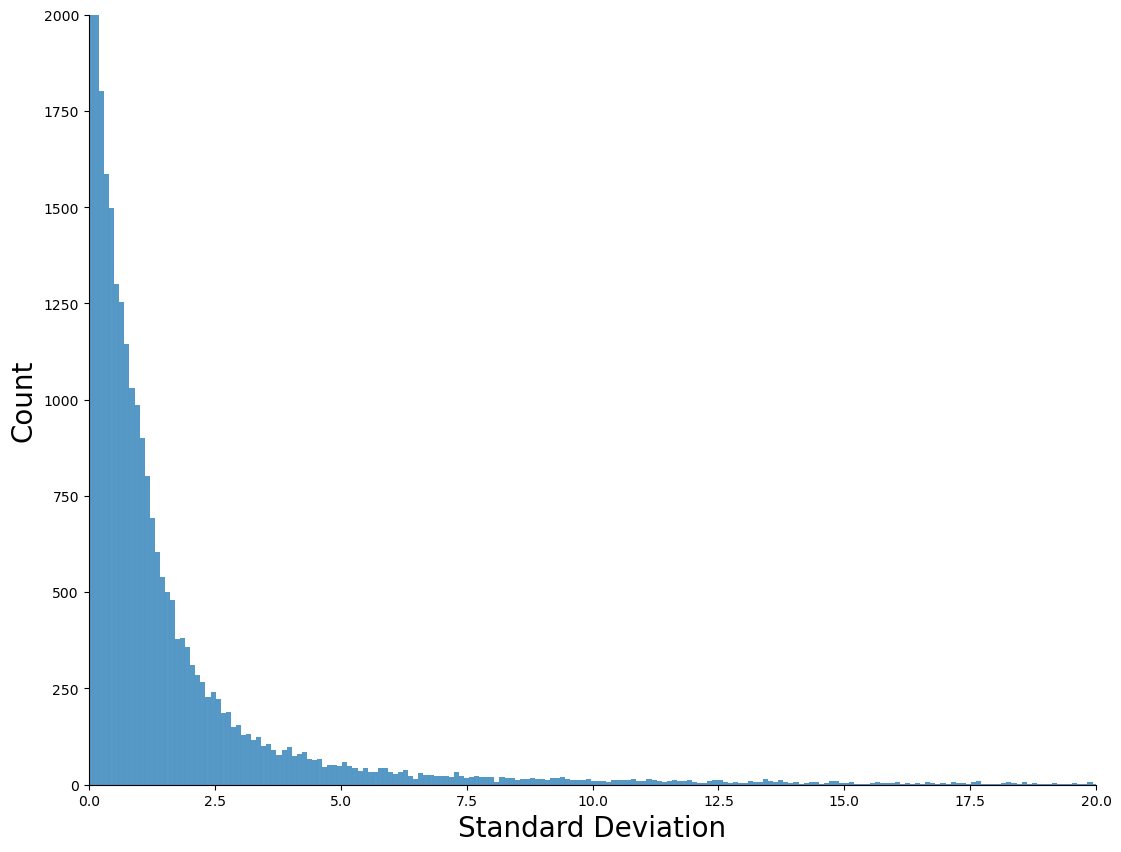

In [32]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Standard Deviation',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Standard Deviation", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,20))
plt.ylim((0, 2000))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

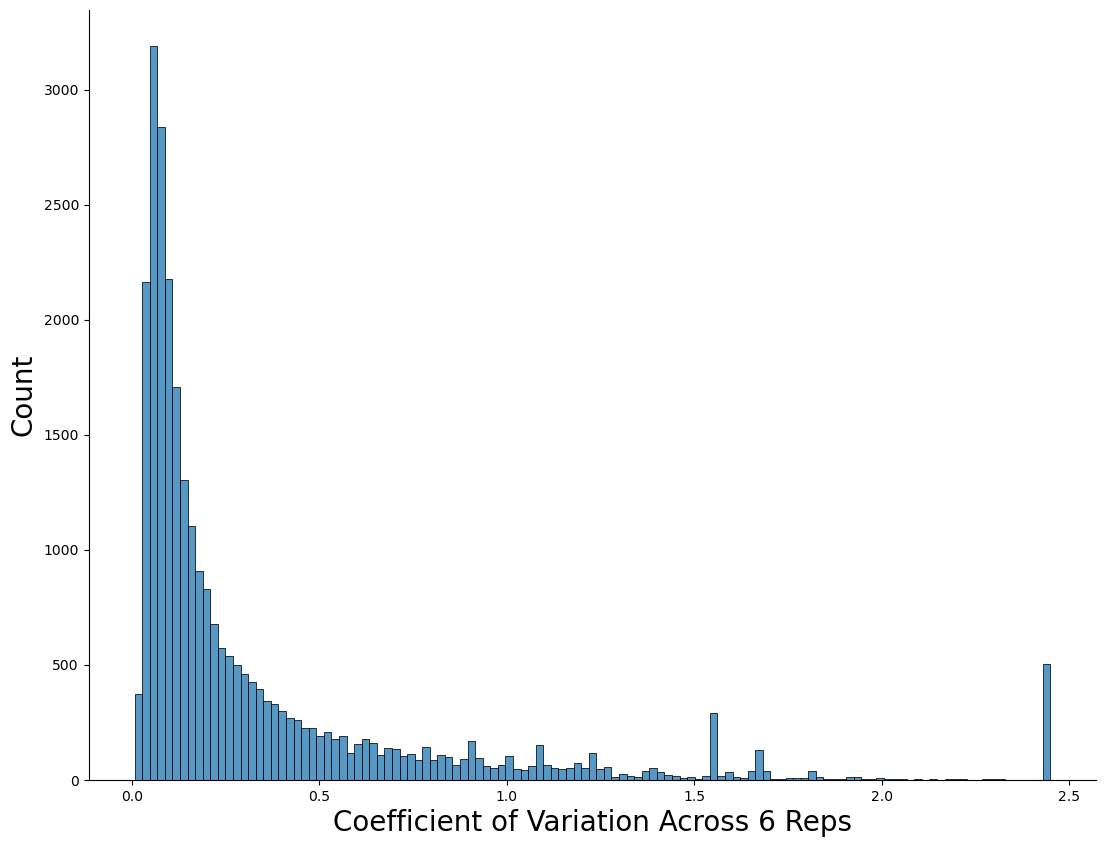

In [34]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Coefficient of Variation',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Coefficient of Variation Across 6 Reps", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,20))
# plt.ylim((0, 2000))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [24]:
ortho_gene_pairs_df

,Alpha Gene,Beta Gene
0,Solaet3.09g002760.1,Solaet3.09g002780.1
1,Solaet3.04g017320.1,Solaet3.04g017830.1
2,Solaet3.06g018940.1,Solaet3.11g014810.1
3,Solaet3.03g013170.1,Solaet3.Mg000860.1
4,Solaet3.02g024950.1,Solaet3.02g024960.1
...,...,...
3015,Solaet3.05g025130.1,Solaet3.12g027670.1
3016,Solaet3.07g005280.1,Solaet3.07g010860.1
3017,Solaet3.05g024570.1,Solaet3.07g029160.1
3018,Solaet3.03g006350.1,Solaet3.09g024900.1


In [25]:
normalized_combined_sample

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6,Mean
FEATURE_ID,,,,,,,
Solaet3.Mg000010.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.Mg000020.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.Mg000030.1,0.0,0.0,0.000000,0.022054,0.0,0.0,0.003676
Solaet3.Mg000040.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.Mg000050.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
Solaet3.ctg00000413g000060.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Solaet3.ctg00000414g000010.1,0.0,0.0,0.165982,0.000000,0.0,0.0,0.027664
Solaet3.ctg00000414g000020.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [26]:
merged_alpha_gene =ortho_gene_pairs_df.merge(right = normalized_combined_sample[['Mean']], left_on = 'Alpha Gene',right_index= True)


In [27]:
merged_alpha_gene = merged_alpha_gene.rename(columns = {'Mean':'Alpha Gene Mean Expression'})
merged_alpha_gene

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression
0,Solaet3.09g002760.1,Solaet3.09g002780.1,0.000000
1,Solaet3.04g017320.1,Solaet3.04g017830.1,1.265657
2,Solaet3.06g018940.1,Solaet3.11g014810.1,212.584162
3,Solaet3.03g013170.1,Solaet3.Mg000860.1,0.067441
4,Solaet3.02g024950.1,Solaet3.02g024960.1,0.000000
...,...,...,...
3015,Solaet3.05g025130.1,Solaet3.12g027670.1,10.093663
3016,Solaet3.07g005280.1,Solaet3.07g010860.1,8.904991
3017,Solaet3.05g024570.1,Solaet3.07g029160.1,0.000000
3018,Solaet3.03g006350.1,Solaet3.09g024900.1,0.000000


In [28]:
paralog_difference_dataframe = merged_alpha_gene.merge(right = normalized_combined_sample[['Mean']], left_on = 'Beta Gene',right_index= True)
paralog_difference_dataframe = paralog_difference_dataframe.rename(columns  = {'Mean':'Beta Gene Mean Expression'})
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression
0,Solaet3.09g002760.1,Solaet3.09g002780.1,0.000000,0.000000
1,Solaet3.04g017320.1,Solaet3.04g017830.1,1.265657,0.038310
2,Solaet3.06g018940.1,Solaet3.11g014810.1,212.584162,178.933096
3,Solaet3.03g013170.1,Solaet3.Mg000860.1,0.067441,0.065010
4,Solaet3.02g024950.1,Solaet3.02g024960.1,0.000000,0.000000
...,...,...,...,...
3015,Solaet3.05g025130.1,Solaet3.12g027670.1,10.093663,7.057000
3016,Solaet3.07g005280.1,Solaet3.07g010860.1,8.904991,28.779943
3017,Solaet3.05g024570.1,Solaet3.07g029160.1,0.000000,0.000000
3018,Solaet3.03g006350.1,Solaet3.09g024900.1,0.000000,0.000000


In [29]:
paralog_difference_dataframe['Rep Difference'] = abs(paralog_difference_dataframe['Alpha Gene Mean Expression'] - paralog_difference_dataframe['Beta Gene Mean Expression'])

In [30]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression,Rep Difference
0,Solaet3.09g002760.1,Solaet3.09g002780.1,0.000000,0.000000,0.000000
1,Solaet3.04g017320.1,Solaet3.04g017830.1,1.265657,0.038310,1.227347
2,Solaet3.06g018940.1,Solaet3.11g014810.1,212.584162,178.933096,33.651066
3,Solaet3.03g013170.1,Solaet3.Mg000860.1,0.067441,0.065010,0.002431
4,Solaet3.02g024950.1,Solaet3.02g024960.1,0.000000,0.000000,0.000000
...,...,...,...,...,...
3015,Solaet3.05g025130.1,Solaet3.12g027670.1,10.093663,7.057000,3.036663
3016,Solaet3.07g005280.1,Solaet3.07g010860.1,8.904991,28.779943,19.874952
3017,Solaet3.05g024570.1,Solaet3.07g029160.1,0.000000,0.000000,0.000000
3018,Solaet3.03g006350.1,Solaet3.09g024900.1,0.000000,0.000000,0.000000


In [31]:
paralog_difference_dataframe['Genes Averaged'] = paralog_difference_dataframe[['Alpha Gene Mean Expression','Beta Gene Mean Expression']].mean(axis =1)

In [32]:
paralog_difference_dataframe['Percent Change'] = (paralog_difference_dataframe['Genes Averaged']/paralog_difference_dataframe['Rep Difference'])*100

In [33]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change
0,Solaet3.09g002760.1,Solaet3.09g002780.1,0.000000,0.000000,0.000000,0.000000,NaN
1,Solaet3.04g017320.1,Solaet3.04g017830.1,1.265657,0.038310,1.227347,0.651984,53.121365
2,Solaet3.06g018940.1,Solaet3.11g014810.1,212.584162,178.933096,33.651066,195.758629,581.730845
3,Solaet3.03g013170.1,Solaet3.Mg000860.1,0.067441,0.065010,0.002431,0.066225,2724.161204
4,Solaet3.02g024950.1,Solaet3.02g024960.1,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...
3015,Solaet3.05g025130.1,Solaet3.12g027670.1,10.093663,7.057000,3.036663,8.575331,282.393234
3016,Solaet3.07g005280.1,Solaet3.07g010860.1,8.904991,28.779943,19.874952,18.842467,94.805093
3017,Solaet3.05g024570.1,Solaet3.07g029160.1,0.000000,0.000000,0.000000,0.000000,NaN
3018,Solaet3.03g006350.1,Solaet3.09g024900.1,0.000000,0.000000,0.000000,0.000000,NaN


(0.0, 1250.0)

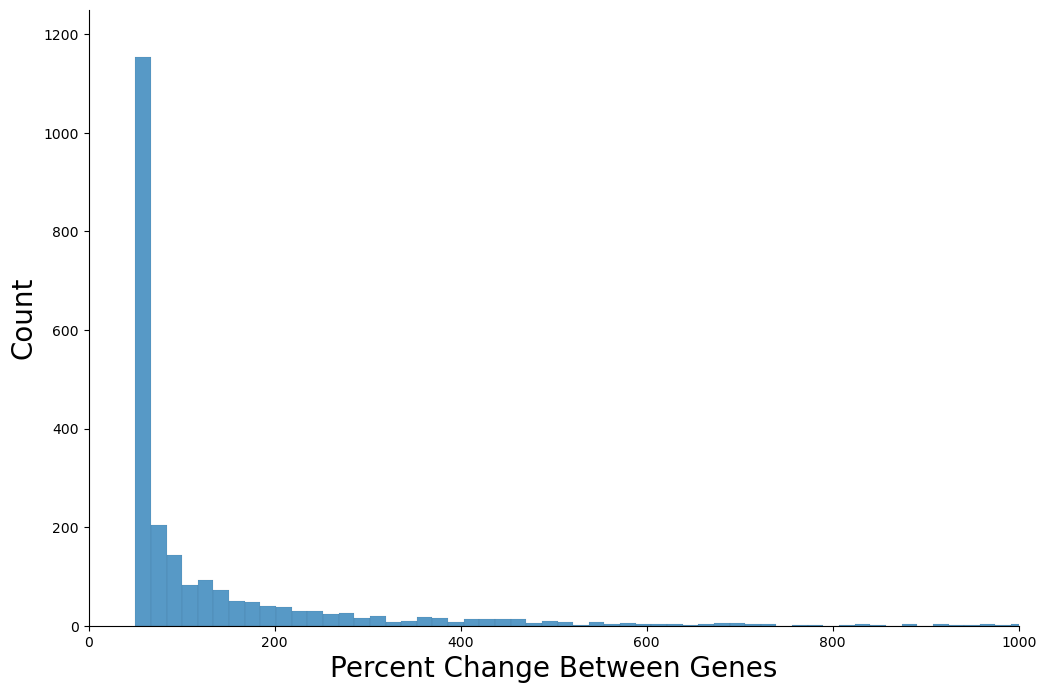

In [34]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = paralog_difference_dataframe, x = 'Percent Change',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Percent Change Between Genes", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,1000))
plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [35]:
np.percentile(paralog_difference_dataframe['Percent Change'].dropna(), 85)

279.0916496011139

In [36]:
np.percentile(paralog_difference_dataframe['Rep Difference'], 95)

89.24198371093415

(0.0, 200.0)

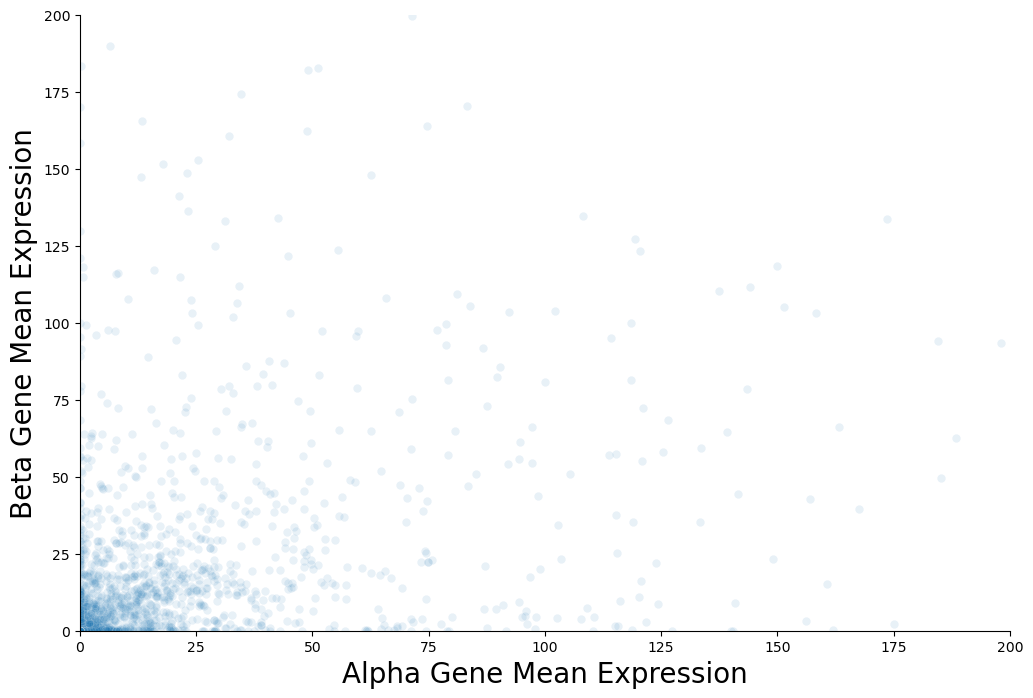

In [37]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = paralog_difference_dataframe, x = 'Alpha Gene Mean Expression', y = 'Beta Gene Mean Expression', alpha= .1)
plt.ylabel("Beta Gene Mean Expression", fontsize = 20)
plt.xlabel("Alpha Gene Mean Expression", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,200))
plt.ylim((0, 200))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

(0.0, 1250.0)

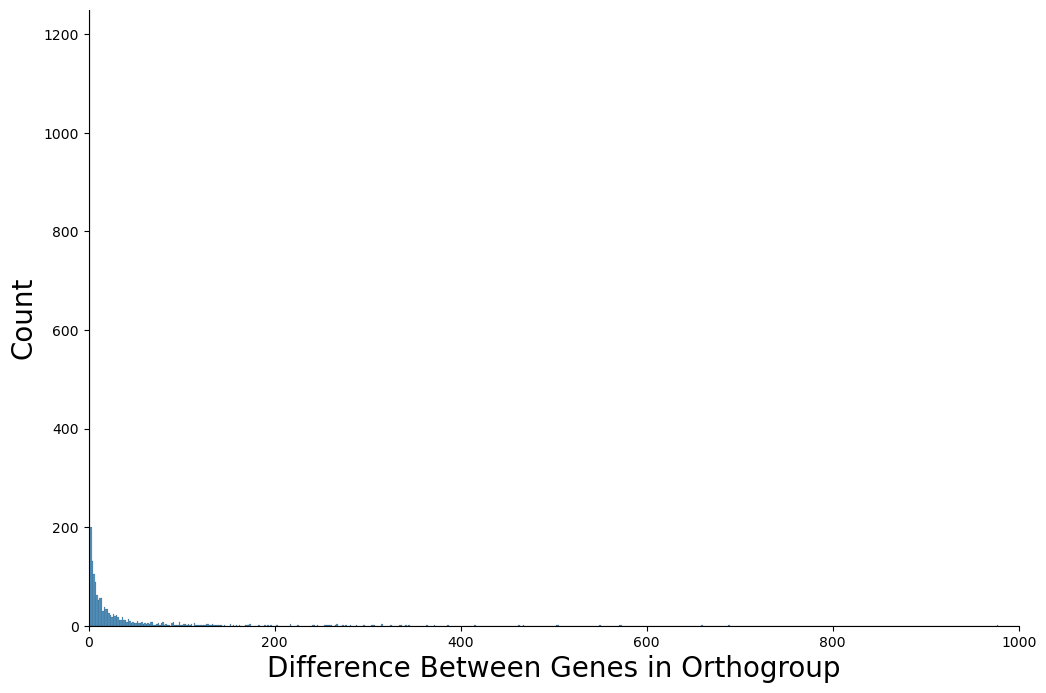

In [38]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = paralog_difference_dataframe, x = 'Rep Difference',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Difference Between Genes in Orthogroup", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,1000))
plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [39]:
paralog_difference_dataframe['Log2 Fold Change'] = np.log2((paralog_difference_dataframe['Alpha Gene Mean Expression']+1))-np.log2((paralog_difference_dataframe['Beta Gene Mean Expression']+1))

In [40]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
0,Solaet3.09g002760.1,Solaet3.09g002780.1,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
1,Solaet3.04g017320.1,Solaet3.04g017830.1,1.265657,0.038310,1.227347,0.651984,53.121365,1.125692
2,Solaet3.06g018940.1,Solaet3.11g014810.1,212.584162,178.933096,33.651066,195.758629,581.730845,0.247344
3,Solaet3.03g013170.1,Solaet3.Mg000860.1,0.067441,0.065010,0.002431,0.066225,2724.161204,0.003289
4,Solaet3.02g024950.1,Solaet3.02g024960.1,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...
3015,Solaet3.05g025130.1,Solaet3.12g027670.1,10.093663,7.057000,3.036663,8.575331,282.393234,0.461421
3016,Solaet3.07g005280.1,Solaet3.07g010860.1,8.904991,28.779943,19.874952,18.842467,94.805093,-1.588113
3017,Solaet3.05g024570.1,Solaet3.07g029160.1,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
3018,Solaet3.03g006350.1,Solaet3.09g024900.1,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


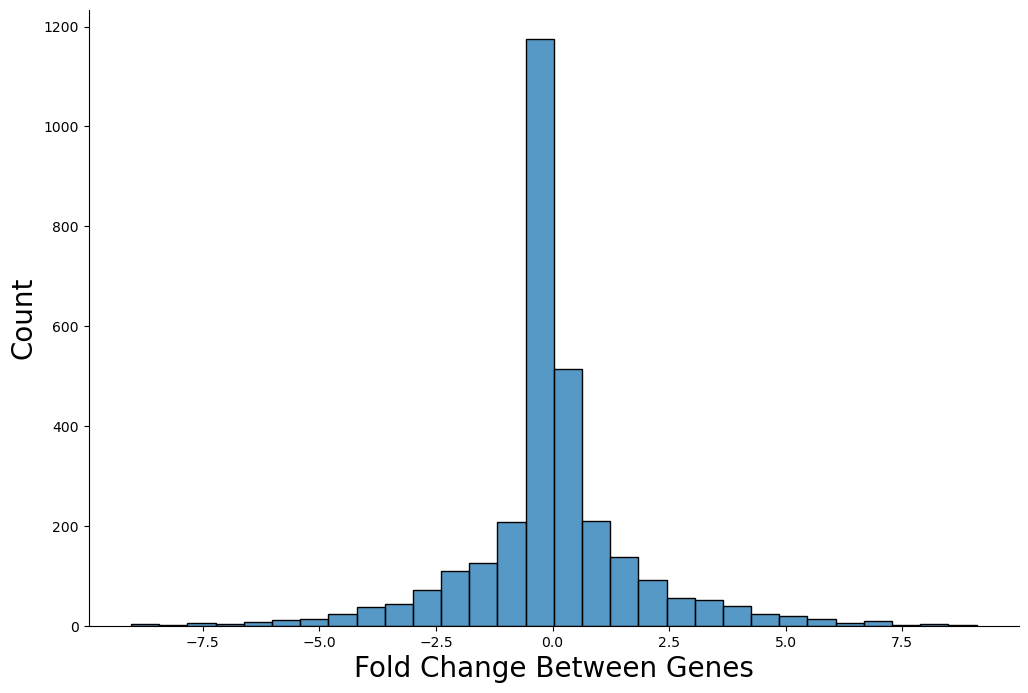

In [41]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = paralog_difference_dataframe, x = 'Log2 Fold Change', bins = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Fold Change Between Genes", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [42]:
np.percentile(paralog_difference_dataframe['Log2 Fold Change'], 95)

3.194639983802345